# Assignment: PCA Implementation

In [3]:
import pandas as pd

In [33]:
wine = pd.read_csv('wine.data')
wine.head()


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [34]:
from sklearn.model_selection import train_test_split
X = wine.drop(['1065'], axis = 1)
y = wine['1065']
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [35]:
X_train

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
100,2,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77
122,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10
153,3,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55
51,1,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78
106,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42
14,1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88
92,2,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30


In [36]:
y

0      1050
1      1185
2      1480
3       735
4      1450
       ... 
172     740
173     750
174     835
175     840
176     560
Name: 1065, Length: 177, dtype: int64

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [38]:
Principal_Component = pca.fit_transform(X_train)
print(pca.components_)

[[-8.09587467e-03  1.27769438e-02 -5.59040021e-03  6.04674123e-03
  -8.49038786e-03  9.98875368e-01  8.86113527e-03  1.28247254e-02
  -1.62686957e-03  8.80287415e-03  3.94419483e-02  6.77860577e-04
  -2.14616909e-04]
 [ 1.30254736e-01 -5.65134708e-02  1.24542884e-01  3.46204016e-02
   9.70252734e-01  1.14488629e-02 -6.21599027e-02 -1.05820488e-01
   1.22669180e-02 -3.18643159e-02  3.23493937e-02 -2.28123360e-02
  -6.17612952e-02]
 [ 1.18622000e-01  1.77288961e-01  1.90258632e-01  1.34174805e-02
  -9.03280911e-02 -3.54486945e-02 -4.89886665e-02 -1.28193619e-01
   1.42912095e-02 -2.07220259e-02  9.28108449e-01 -5.44648001e-02
  -1.57748074e-01]]


In [39]:
pca.explained_variance_ratio_

array([0.90247665, 0.05403709, 0.02755577])

In [40]:
pca.explained_variance_

array([194.19083246,  11.62745544,   5.92932603])

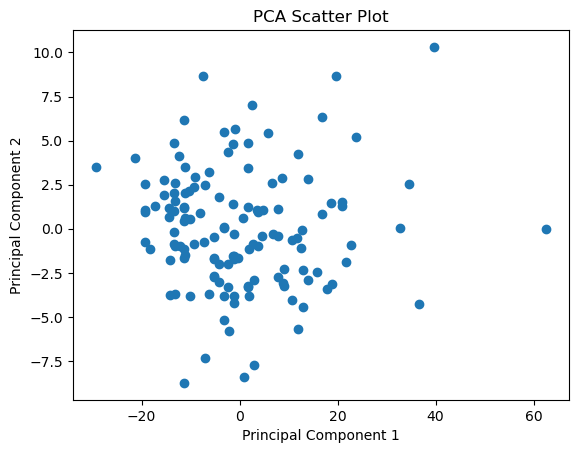

In [41]:
import matplotlib.pyplot as plt
# create a scatter plot of the first two principal components
plt.scatter(Principal_Component[:, 0], Principal_Component[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict()

TypeError: _BaseKMeans.fit_predict() missing 1 required positional argument: 'X'